In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as metrics
import seaborn as sn
drRatings = pd.read_excel('./OBGYN_new_train_80000.xlsx')
drRatings.head(5)

,reviewID,doctorID,doctorName,specialty,numReviews,city,state,doctorHomepage,averageRating,staff,punctuality,helpfulness,knowledge,postedTime,review,review_helpful_count
0,1,2320644,Dr. Kevin G. Fahey,Gynecologist (OBGYN),2,New Haven,MI,/doctor-ratings/2320644/Dr-KEVIN%2BG.-FAHEY-Ne...,4.25,4,3,5,5,2013-06-12 16:00:00,I went to this doctor because he was close to ...,0
1,2,961169,Dr. Sudha R. Nair,Gynecologist (OBGYN),5,Knoxville,TN,/doctor-ratings/961169/Dr-Sudha%2BR.-Nair-Knox...,2.00,2,3,2,1,2010-03-21 16:36:00,"unprofessional, is not knowledgeable of in off...",0
2,3,876934,Dr. Bonnie Gong,Gynecologist (OBGYN),6,Kirkland,WA,/doctor-ratings/876934/Dr-Bonnie-Gong-Kirkland...,4.00,3,3,5,5,2010-08-12 13:08:00,After my doctor had to leave his practice due ...,0
3,4,102625,Dr. Louann Turner,Gynecologist (OBGYN),6,Suffolk,VA,/doctor-ratings/102625/Dr-Louann-Turner-Suffol...,4.50,4,4,5,5,2009-07-23 12:09:00,She is wonderful. She takes her time and tells...,0
4,5,42933,Dr. Michael A. Benson,Gynecologist (OBGYN),21,Staten Island,NY,/doctor-ratings/42933/Dr-Michael%2BA.-Benson-S...,5.00,5,5,5,5,2008-03-14 16:22:00,"Excellent doctor. Caring, considerate, excelle...",0


In [2]:
drRatings['knowledge'].value_counts()

5    51383
1    12790
2     5560
3     5505
4     4762
Name: knowledge, dtype: int64

<Axes: >

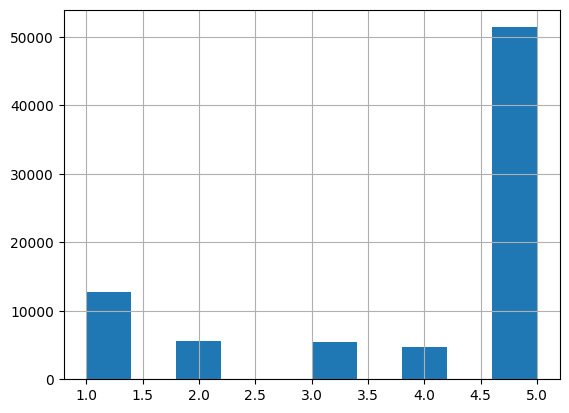

In [3]:
drRatings['knowledge'].hist()

In [4]:
drRatings = drRatings.sample(frac=1)
drRatings['highKnowledge'] = (drRatings['knowledge']>4).astype(int)

temp = pd.get_dummies(drRatings['state'])
drRatings = pd.concat([drRatings,temp],axis=1)
del temp
drRatings['postedTime']=pd.to_datetime(drRatings['postedTime'])
drRatings['year']=drRatings['postedTime'].dt.year
drRatings['month']=drRatings['postedTime'].dt.month
drRatings['day']=drRatings['postedTime'].dt.day
drRatings['hour']=drRatings['postedTime'].dt.hour
drRatings['minute']=drRatings['postedTime'].dt.minute
drRatings['second']=drRatings['postedTime'].dt.second

In [5]:
drRatings.head(5)

,reviewID,doctorID,doctorName,specialty,numReviews,city,state,doctorHomepage,averageRating,staff,...,WB,WI,WV,WY,year,month,day,hour,minute,second
25028,25029,3082862,Dr. William A. BURCH,Gynecologist (OBGYN),28,Arlington,VA,/doctor-ratings/3082862/Dr-William%2BA.-BURCH-...,4.50,5,...,0,0,0,0,2013,6,6,20,55,0
8135,8136,34056,Dr. Emily F. Evitt,Gynecologist (OBGYN),43,Knoxville,TN,/doctor-ratings/34056/Dr-Emily%2BF.-Evitt-Knox...,5.00,5,...,0,0,0,0,2015,1,20,19,49,0
46909,46910,341904,Dr. Timothy Feeney,Gynecologist (OBGYN),5,Indianapolis,IN,/doctor-ratings/341904/Dr-Timothy-Feeney-India...,4.25,3,...,0,0,0,0,2010,10,11,13,19,0
63529,63530,145979,Dr. Kimberly J. Farmer,Gynecologist (OBGYN),30,Las Vegas,NV,/doctor-ratings/145979/Dr-Kimberly%2BJ.-Farmer...,1.00,1,...,0,0,0,0,2009,9,25,1,28,0
1761,1762,189831,Dr. Donald Warren Aptekar,Gynecologist (OBGYN),3,Denver,CO,/doctor-ratings/189831/Dr-Donald%2BWarren-Apte...,1.00,1,...,0,0,0,0,2009,3,27,19,14,0


In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer 
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
def get_positivity(row):
    text = row['review']
    return sia.polarity_scores(text)['pos']

In [8]:
def get_negativity(row):
    text = row['review']
    return sia.polarity_scores(text)['neg']

In [9]:
drRatings.loc[:,'positivity'] = drRatings.apply(get_positivity, axis = 1)

In [10]:
drRatings.loc[:,'negativity'] = drRatings.apply(get_negativity, axis = 1)

In [11]:
drRatings.head(5)

,reviewID,doctorID,doctorName,specialty,numReviews,city,state,doctorHomepage,averageRating,staff,...,WV,WY,year,month,day,hour,minute,second,positivity,negativity
25028,25029,3082862,Dr. William A. BURCH,Gynecologist (OBGYN),28,Arlington,VA,/doctor-ratings/3082862/Dr-William%2BA.-BURCH-...,4.50,5,...,0,0,2013,6,6,20,55,0,0.167,0.042
8135,8136,34056,Dr. Emily F. Evitt,Gynecologist (OBGYN),43,Knoxville,TN,/doctor-ratings/34056/Dr-Emily%2BF.-Evitt-Knox...,5.00,5,...,0,0,2015,1,20,19,49,0,0.328,0.000
46909,46910,341904,Dr. Timothy Feeney,Gynecologist (OBGYN),5,Indianapolis,IN,/doctor-ratings/341904/Dr-Timothy-Feeney-India...,4.25,3,...,0,0,2010,10,11,13,19,0,0.060,0.145
63529,63530,145979,Dr. Kimberly J. Farmer,Gynecologist (OBGYN),30,Las Vegas,NV,/doctor-ratings/145979/Dr-Kimberly%2BJ.-Farmer...,1.00,1,...,0,0,2009,9,25,1,28,0,0.048,0.234
1761,1762,189831,Dr. Donald Warren Aptekar,Gynecologist (OBGYN),3,Denver,CO,/doctor-ratings/189831/Dr-Donald%2BWarren-Apte...,1.00,1,...,0,0,2009,3,27,19,14,0,0.090,0.044


In [12]:
import re
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(text):
  text = text.lower() #lowercase
  text = re.sub(r'[^\w\s]', '', text) #remove punctuations
  text = re.sub(r'\d+', '', text) #remove numbers
  text = " ".join(text.split()) #stripWhitespace
  text = text.split()
  text = [x for x in text if x not in stop_words] #remove stopwords
  text = [x for x in text if x not in ["dr", "doctor","baby","bb","illness","ill","medicine","medical","patients","doctors","clinic","lab","clinics","labs","staff","office","offices","hospital","son","daughter","child","children","sick","treatment","surgery","nurse","appointment","pregnancy","emergency","institution","nursing","hospice","infirmary","dispensary","health","healthy","service","ambulance","care","healthcare","dentist","sanatorium","pharmacy","center","dental","cancer","cough","company","doc","pain","painful","death","therapist","urgent","organization","location","dormitory","year","years","yr","yrs","doc","yearly","experience","write","young","youre","operation","waiting","room","employees","appointment","appointments","atmosphere","issue","issues","reviewer","physician","physicians","infertility","infant","diagnosis","diagnostic","gynecological","surgeons","surgeon","gyn","obgyn","hysterectomy","issue","issues","recovery","csection","vbac","dh","iud","test","birth","practice","testing","practices","discomfort"]] #remove task specific stopwords
  text = " ".join(text)
  #lemmatizer = WordNetLemmatizer()
  #text = [lemmatizer.lemmatize(word) for word in text.split()]  #lemmatization
  #text = " ".join(text)
  return(text)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
stop_words = ["dr", "doctor","baby","bb","illness","ill","medicine","medical","patients","doctors","clinic","lab","clinics","labs","staff","office","offices","hospital","son","daughter","child","children","sick","treatment","surgery","nurse","appointment","pregnancy","emergency","institution","nursing","hospice","infirmary","dispensary","health","healthy","service","ambulance","care","healthcare","dentist","sanatorium","pharmacy","center","dental","cancer","cough","company","doc","pain","painful","death","therapist","urgent","organization","location","dormitory","year","years","yr","yrs","doc","yearly","experience","write","young","youre","operation","waiting","room","employees","appointment","appointments","atmosphere","issue","issues","reviewer","physician","physicians","infertility","infant","diagnosis","diagnostic","gynecological","surgeons","surgeon","gyn","obgyn","hysterectomy","issue","issues","recovery","csection","vbac","dh","iud","test","birth","practice","testing","practices","discomfort"] + list(stop_words)

def calTFIDF(texts,max_features=None):
  vectorizer = TfidfVectorizer(max_features=max_features,lowercase=True,stop_words=stop_words,ngram_range=(1,3))
  TFIDF = vectorizer.fit_transform(texts)
  TFIDF=pd.DataFrame(TFIDF.toarray(),columns=vectorizer.get_feature_names_out())
  return(TFIDF)


In [14]:
import nltk
nltk.download('wordnet')
drRatings['text'] = drRatings['review'].apply(lambda x:preprocess(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
TFIDF=calTFIDF(drRatings['text'],max_features=936)
TFIDF

,able,abnormal,absolute,absolutely,absolutely love,acted,actually,address,addressed,advice,...,world,worried,worry,worse,worst,worth,worth wait,wouldnt,wrong,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.186669,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
79996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
79997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.200989,0.0,0.000000,0.0,0.0,0.145744,0.0,0.0
79998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [16]:
xcols = ['AK', 'AL', 'AR', 'AZ', 'CA','CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 'year', 'month','day','hour','minute','numReviews','positivity', 'negativity', 'review_helpful_count']

In [17]:
ycol = 'highKnowledge'
x = drRatings[xcols].values
x = sm.add_constant(x)
x = np.concatenate([x,TFIDF.values],axis=1)
y = drRatings[ycol]


x_train=x[:20000]
x_test=x[20000:]
y_train=y[:20000]
y_test=y[20000:]
drRatings=drRatings.reset_index(drop=True)
drRatings_train=drRatings.loc[:19999]
drRatings_train=drRatings_train.reset_index(drop=True)
drRatings_test=drRatings.loc[20000:]
drRatings_test=drRatings_test.reset_index(drop=True)

logit_model1 = sm.Logit(y_train, x_train)
logit_result = logit_model1.fit()

         Current function value: 0.218817
         Iterations: 35


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


prediction accuracy is 0.92275


Text(50.722222222222214, 0.5, 'highKnowledge')

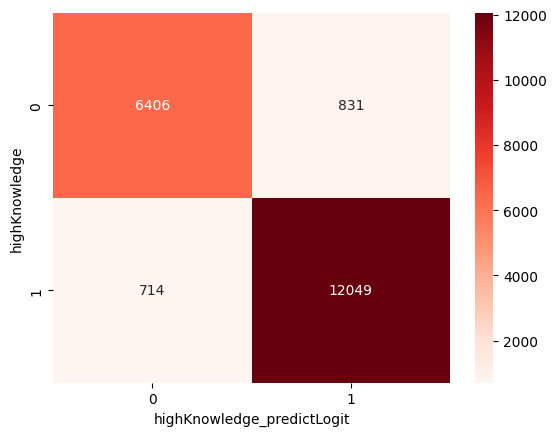

In [18]:
drRatings_train['highKnowledge_predictLogit'] = (logit_result.predict(x_train) >= 0.5).astype(int).tolist()
acc=metrics.accuracy_score(y_true=drRatings_train['highKnowledge'],y_pred=drRatings_train['highKnowledge_predictLogit'])
print('prediction accuracy is',acc)
confusion=metrics.confusion_matrix(y_true=drRatings_train['highKnowledge'],y_pred=drRatings_train['highKnowledge_predictLogit'])
# print(confusion)
sn.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.xlabel("highKnowledge_predictLogit") 
plt.ylabel("highKnowledge") 

prediction accuracy is 0.9026666666666666


Text(50.722222222222214, 0.5, 'highKnowledge')

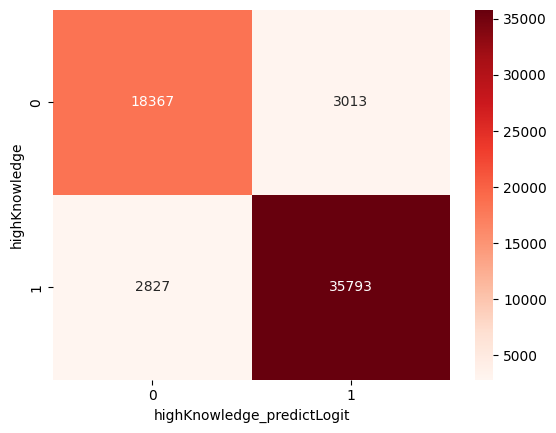

In [19]:
drRatings_test['highKnowledge_predictLogit'] = (logit_result.predict(x_test) >= 0.5).astype(int)
acc=metrics.accuracy_score(y_true=drRatings_test['highKnowledge'],y_pred=drRatings_test['highKnowledge_predictLogit'])
print('prediction accuracy is',acc)
confusion=metrics.confusion_matrix(y_true=drRatings_test['highKnowledge'],y_pred=drRatings_test['highKnowledge_predictLogit'])
# print(confusion)
sn.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.xlabel("highKnowledge_predictLogit")
plt.ylabel("highKnowledge")

In [21]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=861f607296b93f0096a9a051e9ce46c75b96ab64833f712aa80c2edbf6655dc9
  Stored in directory: /root/.cache/pip/wheels/d5/b2/a9/590d15767d34955f20a9a033e8db973b79cb5672d95790c0a9
Successfully built sklearn


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [27]:
predictions_test = logit_result.predict(x_test)>=0.5
predictions_train = logit_result.predict(x_train)>=0.5

In [29]:
#raw count of accuracy 
count = 0
for guess, answer in zip(predictions_test, y_test):
    if guess == answer:
        count += 1
print(count/len(y_test))

count = 0
for guess, answer in zip(predictions_train, y_train):
    if guess == answer:
        count += 1
print(count/len(y_train)) #if there is still some accurancy problem, you need to change the model: random forest model, etc.

0.9087083333333333
0.90725


In [30]:
# final model
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn.metrics as metrics
import seaborn as sn
drRatings = pd.read_excel('./OBGYN_new_train_80000.xlsx')
drRatings = drRatings.sample(frac=1)
drRatings['highKnowledge'] = (drRatings['knowledge']>4).astype(int)

In [31]:
testingdata = pd.read_excel('./OBGYN_new_test_withoutAnswer_20000.xlsx')

In [32]:
temp = pd.get_dummies(drRatings['state'])
drRatings = pd.concat([drRatings,temp],axis=1)
del temp
drRatings['postedTime']=pd.to_datetime(drRatings['postedTime'])
drRatings['year']=drRatings['postedTime'].dt.year
drRatings['month']=drRatings['postedTime'].dt.month
drRatings['day']=drRatings['postedTime'].dt.day
drRatings['hour']=drRatings['postedTime'].dt.hour
drRatings['minute']=drRatings['postedTime'].dt.minute
drRatings['second']=drRatings['postedTime'].dt.second

In [33]:
temp = pd.get_dummies(testingdata['state'])
testingdata = pd.concat([testingdata,temp],axis=1)
del temp
states=drRatings['state'].unique().tolist()
for state in states:
  if state not in testingdata.columns.tolist():
    testingdata[state]=[0]*testingdata.shape[0]
testingdata['postedTime']=pd.to_datetime(testingdata['postedTime'])
testingdata['year']=testingdata['postedTime'].dt.year
testingdata['month']=testingdata['postedTime'].dt.month
testingdata['day']=testingdata['postedTime'].dt.day
testingdata['hour']=testingdata['postedTime'].dt.hour
testingdata['minute']=testingdata['postedTime'].dt.minute
testingdata['second']=testingdata['postedTime'].dt.second


In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer 
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
def get_positivity(row):
    text = row['review']
    return sia.polarity_scores(text)['pos']

In [36]:
def get_negativity(row):
    text = row['review']
    return sia.polarity_scores(text)['neg']

In [37]:
testingdata.loc[:,'positivity'] = testingdata.apply(get_positivity, axis = 1)

In [38]:
testingdata.loc[:,'negativity'] = testingdata.apply(get_negativity, axis = 1)

In [39]:
drRatings.loc[:,'positivity'] = drRatings.apply(get_positivity, axis = 1)

In [40]:
drRatings.loc[:,'negativity'] = drRatings.apply(get_negativity, axis = 1)

In [41]:
import re
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(text):
  text = text.lower() #lowercase
  text = re.sub(r'[^\w\s]', '', text) #remove punctuations
  text = re.sub(r'\d+', '', text) #remove numbers
  text = " ".join(text.split()) #stripWhitespace
  text = text.split()
  text = [x for x in text if x not in stop_words] #remove stopwords
  text = [x for x in text if x not in ["dr", "doctor","baby","bb","illness","ill","medicine","medical","patients","doctors","clinic","lab","clinics","labs","staff","office","offices","hospital","son","daughter","child","children","sick","treatment","surgery","nurse","appointment","pregnancy","emergency","institution","nursing","hospice","infirmary","dispensary","health","healthy","service","ambulance","care","healthcare","dentist","sanatorium","pharmacy","center","dental","cancer","cough","company","doc","pain","painful","death","therapist","urgent","organization","location","dormitory","year","years","yr","yrs","doc","yearly","experience","write","young","youre","operation","waiting","room","employees","appointment","appointments","atmosphere","issue","issues","reviewer","physician","physicians","infertility","infant","diagnosis","diagnostic","gynecological","surgeons","surgeon","gyn","obgyn","hysterectomy","issue","issues","recovery","csection","vbac","dh","iud","test","birth","practice","testing","practices","discomfort"]] #remove task specific stopwords
  text = " ".join(text)
  #lemmatizer = WordNetLemmatizer()
  #text = [lemmatizer.lemmatize(word) for word in text.split()]  #lemmatization
  #text = " ".join(text)
  return(text)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
stop_words = ["dr", "doctor","baby","bb","illness","ill","medicine","medical","patient","patients","doctors","clinic","lab","clinics","labs","staff","office","offices","hospital","son","daughter","child","children","sick","treatment","surgery","nurse","appointment","pregnancy","emergency","institution","nursing","hospice","infirmary","dispensary","health","healthy","service","ambulance","care","healthcare","dentist","sanatorium","pharmacy","center","dental","cancer","cough","company","doc","pain","painful","death","therapist","urgent","organization","location","dormitory","year","years","yr","yrs","doc","yearly","experience","write","young","youre","operation","waiting","room","employees","appointment","appointments","atmosphere","issue","issues","reviewer","physician","physicians","infertility","infant","diagnosis","diagnostic","gynecological","surgeons","surgeon","gyn","obgyn","hysterectomy","issue","issues","recovery","csection","vbac","dh","iud","test","birth","practice","testing","practices","discomfort"] + list(stop_words)

def calTFIDF(texts,max_features=None):
  vectorizer = TfidfVectorizer(max_features=max_features,lowercase=True,stop_words=stop_words,ngram_range=(1,3))
  TFIDF = vectorizer.fit_transform(texts)
  TFIDF=pd.DataFrame(TFIDF.toarray(),columns=vectorizer.get_feature_names_out())
  return(TFIDF)

In [43]:
import nltk
nltk.download('wordnet')
drRatings['text'] = drRatings['review'].apply(lambda x:preprocess(x))
testingdata['text'] = testingdata['review'].apply(lambda x:preprocess(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
alltext=drRatings['text'].tolist()+testingdata['text'].tolist()

In [45]:
TFIDF=calTFIDF(alltext,max_features=936)
TFIDF.columns = ['tfidf_'+x for x in TFIDF.columns]
TFIDF_train = TFIDF[:80000]
TFIDF_test = TFIDF[80000:]
TFIDF_test=TFIDF_test.reset_index(drop=True)
TFIDF

,tfidf_able,tfidf_abnormal,tfidf_absolute,tfidf_absolutely,tfidf_absolutely love,tfidf_acted,tfidf_actually,tfidf_address,tfidf_addressed,tfidf_advice,...,tfidf_world,tfidf_worried,tfidf_worry,tfidf_worse,tfidf_worst,tfidf_worth,tfidf_worth wait,tfidf_wouldnt,tfidf_wrong,tfidf_yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.206191,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.291074,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [46]:
xcols = ['AK', 'AL', 'AR', 'AZ', 'CA','CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 'year', 'month','day','hour','minute','numReviews','positivity', 'negativity', 'review_helpful_count']

In [47]:
ycol = 'highKnowledge'
x = drRatings[xcols].values
x = sm.add_constant(x)
x = np.concatenate([x,TFIDF_train.values],axis=1)
y = drRatings[ycol]


logit_model1 = sm.Logit(y, x)
logit_result = logit_model1.fit()



Optimization terminated successfully.
         Current function value: 0.233761
         Iterations 9


In [48]:
x = testingdata[xcols].values
x = sm.add_constant(x)
x = np.concatenate([x,TFIDF_test.values],axis=1)


pred = (logit_result.predict(x) >= 0.5).astype(int)
pred_prob = logit_result.predict(x)

In [49]:
print(pred)
print(pred_prob)

[1 1 1 ... 1 0 1]
[0.88669099 0.97631979 0.93159869 ... 0.74433564 0.05092624 0.53657074]


In [50]:
submitcsv=pd.DataFrame()
submitcsv['reviewID']=testingdata['reviewID'].tolist()
submitcsv['prediction']=pred
submitcsv.to_csv('submission.csv',index=False)
print(submitcsv)

       reviewID  prediction
0         80001           1
1         80002           1
2         80003           1
3         80004           1
4         80005           1
...         ...         ...
19995     99996           1
19996     99997           1
19997     99998           1
19998     99999           0
19999    100000           1

[20000 rows x 2 columns]
